# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Alison Hatfield
### GitHub: https://github.com/ajhatfield/article-summarizer 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [205]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
bs4                0.0.2
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
html-parser        0.2
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk    

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [206]:
#import required packages
import requests
import pickle
from bs4 import BeautifulSoup

#set URL / varibles
url = 'https://www.forbes.com/sites/forbestechcouncil/2019/01/31/how-data-analysis-in-sports-is-changing-the-game/?sh=72a2e77b3f7b'
#Get URL
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
article = str(soup.find("article"))
filename = "article.pkl"

with open(filename, "wb") as file:
    pickle.dump(article, file)

print(f'The article was successfully extracted to {filename}')

The article was successfully extracted to article.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [207]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load HTML
with open('article.pkl', 'rb') as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

blob = TextBlob(text)

polarity_score = blob.sentiment.polarity

sentence_num = len(blob.sentences)

#Print score
print(f'The Polarity score the the sentiment analysis is {polarity_score}') 
print(f'The number of sentences in the article are: {sentence_num}')


The Polarity score the the sentiment analysis is 0.1402915711739241
The number of sentences in the article are: 39


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [208]:
#import packages that have not yet been imported
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

with open("article.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
document = nlp(text)
tokens = [token.text.lower() for token in document if token.is_alpha and token.text.lower() not in STOP_WORDS]

#Count the number of tokens
counter = Counter(tokens)

#Get top 5 by number of tokens
top_5_tokens = counter.most_common(5)

#Print top 5 most common tokens with thier frequency 
print("The top 5 most frequent tokens are:")
for token, frequency in top_5_tokens:
    print(f'{token}, {frequency}')
    
#Print all tokens with their frequency 
print("\nAll the tokens and their frequency are:")
for token, frequency in counter.items():
    print(f'{token}, {frequency}')

The top 5 most frequent tokens are:
data, 16
sports, 14
teams, 13
analytics, 13
analysis, 6

All the tokens and their frequency are:
forbesapr, 1
edtthe, 2
prompt, 2
machine, 1
learning, 1
paradiseapr, 1
edtmaximizing, 1
business, 2
efficiency, 1
ai, 2
driven, 2
digital, 3
twinsapr, 1
edtadversary, 1
ally, 1
generative, 1
cybersecurity, 1
collideapr, 1
edtenhancing, 1
workplace, 1
safety, 1
law, 1
enforcement, 1
collaborationapr, 1
edtcatalyzing, 1
supply, 2
chain, 2
transformation, 1
role, 3
artificial, 1
intelligence, 2
oracle, 1
erp, 1
solutionsapr, 1
tech, 1
diplomacy, 1
building, 1
transnational, 1
businessapr, 1
edthow, 1
universities, 1
leverage, 1
experience, 3
gradeapr, 1
edtfrom, 1
coding, 1
grind, 1
innovative, 2
mastermind, 1
teams, 13
transformationedit, 1
storyinnovationhow, 1
data, 16
analysis, 6
sports, 14
changing, 2
gameabhas, 1
rickyformer, 1
forbes, 3
councils, 2
memberforbes, 1
technology, 5
councilcouncil, 1
postexpertise, 1
members, 1
operated, 1
license, 1
opini

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [209]:
#load in article
with open('article.pkl', 'rb') as file:
    article_html = pickle.load(file)
    
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
document = nlp(text)

#Removing punctuiation, whitespace, lemmatize tokens, and stop words. 
lemmas = [token.lemma_.lower() for token in document if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]

counter = Counter(lemmas)

top_5_lemmas = counter.most_common(5)

#Print top 5 most common lemmas with thier frequency 
print("The top 5 most frequent lemmas are:")
for lemma, frequency in top_5_lemmas:
    print(f'{lemma}, {frequency}')
    
#Print all lemmas with their frequency 
print("\nAll the lemmas and their frequency are:")
for lemma, frequency in counter.items():
    print(f'{lemma}, {frequency}')

The top 5 most frequent lemmas are:
datum, 14
team, 13
sport, 11
analytic, 10
use, 10

All the lemmas and their frequency are:
forbesapr, 1
edtthe, 2
prompt, 2
machine, 1
learning, 1
paradiseapr, 1
edtmaximizing, 1
business, 2
efficiency, 1
ai, 2
drive, 3
digital, 3
twinsapr, 1
edtadversary, 1
ally, 1
generative, 1
cybersecurity, 1
collideapr, 1
edtenhancing, 1
workplace, 1
safety, 1
law, 1
enforcement, 1
collaborationapr, 1
edtcatalyzing, 1
supply, 2
chain, 2
transformation, 1
role, 3
artificial, 1
intelligence, 2
oracle, 1
erp, 1
solutionsapr, 1
tech, 1
diplomacy, 1
building, 1
transnational, 1
businessapr, 1
edthow, 1
university, 2
leverage, 1
experience, 4
gradeapr, 1
edtfrom, 1
code, 1
grind, 1
innovative, 2
mastermind, 1
teams, 2
transformationedit, 1
storyinnovationhow, 1
datum, 14
analysis, 6
sports, 3
change, 3
gameabhas, 1
rickyformer, 1
forbes, 3
councils, 2
memberforbes, 1
technology, 6
councilcouncil, 1
postexpertise, 1
member, 1
operate, 1
license, 1
opinion, 1
express, 1

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [210]:
#Getting set of top 5 tokens by freq (found in question 3)
tokens = set()
for token, frequency in top_5_tokens:
    tokens.add(token)

#looping through to find scores for each sentence
for sentence in list(document.sents) :
    start= 0
    for token in sentence:
        if token.text.lower() in tokens:
            start+= 1
    start2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            start2 += 1
    #creating output that will show whole sentence and the score of the token.
    sentence_list = str(sentence).replace('\n','').replace('  ',' ')
    tscore = start/start2
    print(tscore,':',sentence_list)

0.0 : More From ForbesApr 16, 2024,12:42pm EDTThe Prompt: Machine Learning ParadiseApr 16, 2024,12:33pm EDTMaximizing Business Efficiency With AI-Driven Digital TwinsApr 16, 2024,10:15am EDTAdversary Or Ally:
0.0 : When Generative AI And Cybersecurity CollideApr 16, 2024,10:00am EDTEnhancing Workplace Safety Through Law Enforcement CollaborationApr 16, 2024,09:45am EDTCatalyzing Supply Chain Transformation: The Role Of Artificial Intelligence In Oracle's ERP SolutionsApr 16, 2024,09:30am
0.07272727272727272 : EDTThe Role Of Tech Diplomacy In Building Transnational BusinessApr 16, 2024,09:15am EDTHow Universities Can Leverage Digital Experience To Make The GradeApr 16, 2024,09:00am EDTFrom Coding Grind To Innovative Mastermind: Our Teams’ TransformationEdit StoryInnovationHow Data Analysis In Sports Is Changing The GameAbhas RickyFormer Forbes Councils MemberForbes Technology CouncilCOUNCIL POSTExpertise from Forbes Councils members, operated under license.
0.02702702702702703 : Opinion

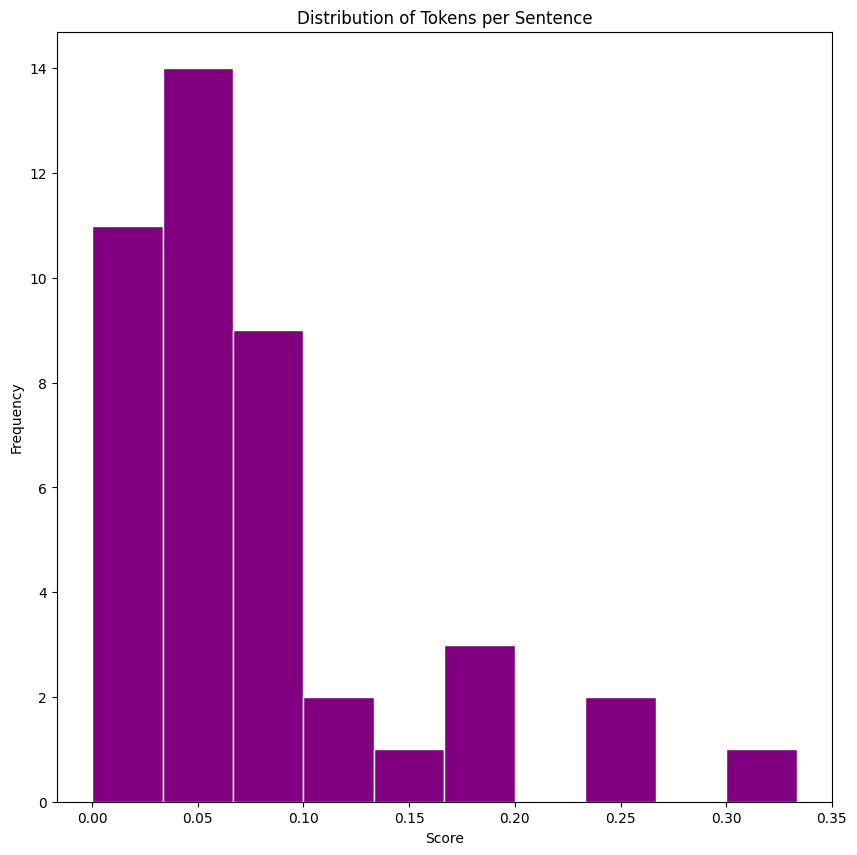

In [211]:
#looping through to find the token score again - this time appead all scores into a list instead of printing. 
token_scores = []
for sentence in list(document.sents):
    start= 0
    for token in sentence:
        if token.text.lower() in tokens:
            start += 1
    start2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            start2 += 1
    token_score = start / start2 if start2 > 0 else 0
    token_scores.append(token_score)

#plot histogram
plt.figure(figsize = (10,10))
plt.hist(token_scores, bins = 10, color = 'purple', edgecolor = 'white')
plt.title('Distribution of Tokens per Sentence')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

The most common range of score are in between 0.00 and 0.06 based on the above histogram. 

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [212]:
#Getting set of top 5 lemmas by freq (found in question 4)
lemmas = set()
for lemma, frequency in top_5_lemmas:
    lemmas.add(lemma)

#Looping through sentences to find the score
for sentence in list(document.sents):
    start= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in lemmas:
            start+= 1
    start2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            start2 += 1
    #creating ourput that will show full sentence and the lemma score
    sentence_list = str(sentence).replace('\n','').replace('  ',' ')
    print(start/start2,':',sentence_list)

0.0 : More From ForbesApr 16, 2024,12:42pm EDTThe Prompt: Machine Learning ParadiseApr 16, 2024,12:33pm EDTMaximizing Business Efficiency With AI-Driven Digital TwinsApr 16, 2024,10:15am EDTAdversary Or Ally:
0.0 : When Generative AI And Cybersecurity CollideApr 16, 2024,10:00am EDTEnhancing Workplace Safety Through Law Enforcement CollaborationApr 16, 2024,09:45am EDTCatalyzing Supply Chain Transformation: The Role Of Artificial Intelligence In Oracle's ERP SolutionsApr 16, 2024,09:30am
0.01818181818181818 : EDTThe Role Of Tech Diplomacy In Building Transnational BusinessApr 16, 2024,09:15am EDTHow Universities Can Leverage Digital Experience To Make The GradeApr 16, 2024,09:00am EDTFrom Coding Grind To Innovative Mastermind: Our Teams’ TransformationEdit StoryInnovationHow Data Analysis In Sports Is Changing The GameAbhas RickyFormer Forbes Councils MemberForbes Technology CouncilCOUNCIL POSTExpertise from Forbes Councils members, operated under license.
0.02702702702702703 : Opinion

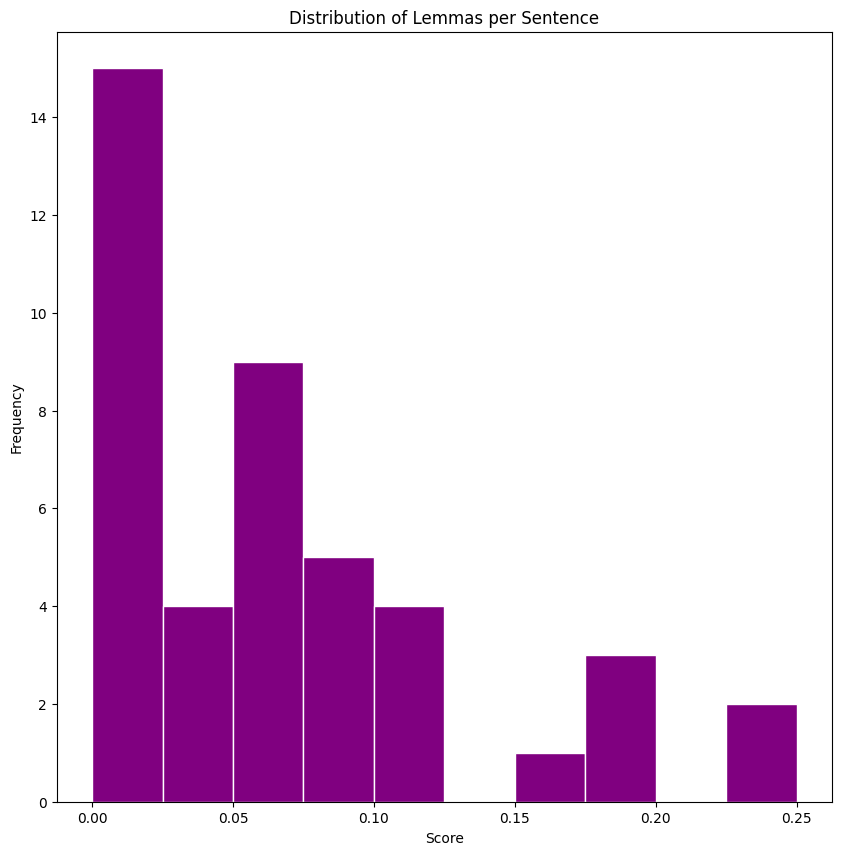

In [213]:
lemma_scores = []

#looping through to find the lemma score again - this time appead all scores into a list instead of printing. 
for sentence in list(document.sents):
    start = 0
    for token in sentence:
        if token.lemma_.lower() in lemmas:
            start += 1
    start2 = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            start2 += 1
    lemma_score = start/ start2 if start2 > 0 else 0
    lemma_scores.append(lemma_score)
    
#plot histogram
plt.figure(figsize = (10,10))
plt.hist(lemma_scores, bins = 10, color = 'purple', edgecolor = 'white')
plt.title('Distribution of Lemmas per Sentence')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

The most common range of scores is between 0.00 and 0.025, based on the histogram. The scecond most common range is between 0.05 and 0.075. There is a valley in between the two ranges mentioned. 

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens):  0.08
* Cutoff Score (lemmas): 0.09

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [214]:
# Finding scores for tokens and lemmas that were in the 75 percentile to determine cutoff
import numpy as np 

tarray = np.array(token_scores)
cutoff_token = round(np.percentile(tarray,75),2)

larray = np.array(lemma_scores)
cutoff_lemma = round(np.percentile(larray,75),2)

print(f'Cutoff Score (tokens): {cutoff_token}')
print(f'Cutoff Score (lemmas): {cutoff_lemma}')

Cutoff Score (tokens): 0.08
Cutoff Score (lemmas): 0.09


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [215]:
token_summary = []

cutoff_token = 0.08
#Looping through to see if socre is above or below cutoff score
for sentence, score in zip(sentences, token_scores):
    if score > cutoff_token:
        token_summary.append(sentence.text.strip())
#creating summary using the list of sentences we found above
tsummary = ' '.join(token_summary)

print(f'Summary: {tsummary}')

Summary: Opinions expressed are those of the author.| Membership (fee-based)POST WRITTEN BYAbhas RickyJan 31, 2019,07:15am ESTShare to FacebookShare to TwitterShare to Linkedin






GettyGetty




Any baseball fan knows that analyzing data is a big part of the experience. But data analysis in sports is now taking teams far beyond old-school sabermetrics and game performance. Here's how analytics have (and will to) become more prevalent in the industry. The feat inspired the book and subsequent feature film Moneyball. They can mine sentiment from social media streams to understand what fans are thinking and can use analytics to engage those fans via social channels. Data from customer engagement also extends into the stadium, where teams can use electronic tickets -- and even fingerprint or retinal scans -- to understand fan movements. Benefiting The Broader Ecosystem This analytics data even helps teams sell more beer and improve parking lot congestion at stadiums. Improving Back-Offi

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [216]:
import spacy 
# loading token summary into spacy
nlp = spacy.load("en_core_web_sm")
document = nlp(tsummary)
#Getting sentiment score of token summary
summary_score = document.sentiment
print(f'The polarity score of the token summary is: {summary_score}')

#Finding the number of sentences in token summary
summary_sentences_num = len(list(document.sents))
print(f'The number of sentences in the summary are: {summary_sentences_num}')

The polarity score of the token summary is: 0.0
The number of sentences in the summary are: 13


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [217]:
lemma_summary = []

cutoff_lemma = 0.09
#Looping through to see if socre is above or below cutoff score
for sentence, score in zip(sentences, lemma_scores):
    if score > cutoff_lemma:
        lemma_summary.append(sentence.text.strip())
#creating summary using the list of sentences we found above
lsummary = ' '.join(lemma_summary)

print(f'Summary: {lsummary}')

Summary: Opinions expressed are those of the author.| Membership (fee-based)POST WRITTEN BYAbhas RickyJan 31, 2019,07:15am ESTShare to FacebookShare to TwitterShare to Linkedin






GettyGetty




Any baseball fan knows that analyzing data is a big part of the experience. But data analysis in sports is now taking teams far beyond old-school sabermetrics and game performance. The feat inspired the book and subsequent feature film Moneyball. Social media is proving to be a great marketing ground for university teams to connect with millennials and market tickets using data-driven campaigns. Data from customer engagement also extends into the stadium, where teams can use electronic tickets -- and even fingerprint or retinal scans -- to understand fan movements. Benefiting The Broader Ecosystem This analytics data even helps teams sell more beer and improve parking lot congestion at stadiums. Improving Back-Office Intelligence
Analytics from all these areas can help a company make operati

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [218]:
import spacy 
# loading lemma summary into spacy
nlp = spacy.load("en_core_web_sm")
document = nlp(lsummary)
#Getting sentiment score of lemma summary
summary_score = document.sentiment
print(f'The polarity score of the lemma summary is: {summary_score}')

#Finding the number of sentences in token summary
summary_sentences_num = len(list(document.sents))
print(f'The number of sentences in the summary are: {summary_sentences_num}')

The polarity score of the lemma summary is: 0.0
The number of sentences in the summary are: 11


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

In [219]:
print(f'The Polarity score the the sentiment analysis is {polarity_score}') 
print(f'The polarity score of the token summary is: {summary_score}')
print(f'The polarity score of the lemma summary is: {summary_score}')

The Polarity score the the sentiment analysis is 0.1402915711739241
The polarity score of the token summary is: 0.0
The polarity score of the lemma summary is: 0.0


The scores of both my summaries were 0.0 showing they are very neutral. I think, with a topic like this, if you take out a lot of the 'fluff' and only leave the facts behind like you do in a summary, you lose the extra emotion. The overall score was 0.14 showing the author has a positive outlook on analytics in sports. If you want to know the mood of this article, I think it is best to read the whole thing rather than summerizing it and the polarity scores prove that. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think the token summary did a better job of summerizing the whole article. The token summary gave enough detail where the reader can take away actual facts rather than broad ideas like the lemma summary. For example, the token summary took out the sentence: "They can mine sentiment from social media streams to understand what fans are thinking and can use analytics to engage those fans via social channels," while the lemma summary took out the sentence "Social media is proving to be a great marketing ground for university teams to connect with millennials and market tickets using data-driven campaigns." In this example, it is clear the token summary goes into depth about how they can use social media in data rather than a broad statement of it can be used like the lemmas summary did. When you reduce words into their base form like lemmatization does, it takes the action out of the word in some cases, so I think you miss out on some big facts that way. 

In [220]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 411897 bytes to article-summarizer.html
